**iteration_data.ipynb**
- analyzes vector change between iterations

Loaded 400 embedding files (0 to 399)


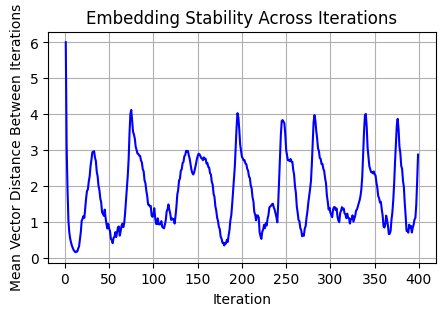

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os

# Load all embedding files dynamically
embeddings = []
iterative_dir = 'data/iterative_vectors/'
file_numbers = sorted([int(f.replace('.json', '')) for f in os.listdir(iterative_dir) if f.endswith('.json')])

for i in file_numbers:
    with open(f'{iterative_dir}{i}.json', 'r') as f:
        embeddings.append(json.load(f))
        
print(f"Loaded {len(embeddings)} embedding files (0 to {file_numbers[-1]})")
words = embeddings[0].keys()
# Calculate average deviation between consecutive iterations
deviations = []
for i in range(len(embeddings)-1):
    distances = []
    for word in words:
        vec1 = np.array(embeddings[i][word])
        vec2 = np.array(embeddings[i+1][word])
        distance = np.linalg.norm(vec1 - vec2)
        distances.append(distance)
    
    # Store average deviation for this iteration
    deviations.append(np.mean(distances))

# Plot the results
plt.figure(figsize=(5, 3))
plt.plot(range(1, len(deviations)+1), deviations, 'b-')
plt.xlabel('Iteration')
plt.ylabel('Mean Vector Distance Between Iterations')
plt.title('Embedding Stability Across Iterations')
plt.grid(True)
plt.show()

In [2]:
import json
import os

kqmw_embeddings = {'king': [], 'queen': [], 'man': [], 'woman': []}
iterative_dir = 'data/iterative_vectors/'
file_numbers = sorted([int(f.replace('.json', '')) for f in os.listdir(iterative_dir) if f.endswith('.json')])

for i in file_numbers:
    with open(f'{iterative_dir}{i}.json', 'r') as f:
        vectors = json.load(f)
        for key in kqmw_embeddings:
            kqmw_embeddings[key].append(vectors[key])
            
print(f"Saved {len(kqmw_embeddings['king'])} iterations for each of {len(kqmw_embeddings)} words")
with open('data/kqmw_iteration.json', 'w+') as f:
    json.dump(kqmw_embeddings, f)

Saved 400 iterations for each of 4 words


/tmp/ipykernel_57210/3090515694.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', modulus)


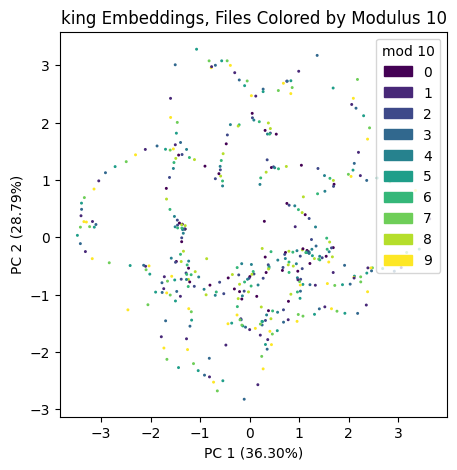

In [3]:
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

modulus = 10
word = 'king'

points = kqmw_embeddings[word]
labels = np.array([i % modulus for i in range(len(points))])
lookup, clabels = np.unique(labels, return_inverse=True)
vectors = np.array(points)

pca = PCA(n_components=2)
features_pca = pca.fit_transform(vectors)
cmap = plt.cm.get_cmap('viridis', modulus)

plt.figure(figsize=(5,5))
plt.scatter(features_pca[:,0], features_pca[:,1], c=clabels, cmap='viridis', s=5, marker='.')

# Add the axis labels
title = f"{word} Embeddings, Files Colored by Modulus {modulus}"
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100)) 
plt.title(title)
plt.legend([mpatches.Patch(color=cmap(b)) for b in range(modulus)], lookup, title = f"mod {modulus}")
plt.savefig(f'pca/{title}.png', dpi=300)

In [4]:
for word in kqmw_embeddings:
    with open(f'data/kqmw_iterations/{word}.txt', 'w+') as f:
        f.writelines([str(vector)+'\n' for vector in kqmw_embeddings[word]])

FileNotFoundError: [Errno 2] No such file or directory: 'data/kqmw_iterations/king.txt'